In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
import pandas as pd

In [2]:
# Import required libraries

from google.colab import files

# Upload CSV file from laptop
uploaded = files.upload()

#  Uploaded data is in dictionary form; convert keys to a list and get the first filename
file_name = list(uploaded.keys())[0]

# Read CSV file into DataFrame
df = pd.read_csv(file_name)

# OR

#df=pd.read_csv("/content/Ice_cream selling data.csv")

df.head()

Saving Ice_cream selling data.csv to Ice_cream selling data.csv


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.size

98

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [5]:
#print(X)
X.head()

,Temperature (°C)
0,-4.662263
1,-4.316559
2,-4.213985
3,-3.949661
4,-3.578554


In [6]:
#print(y)
y.head()

,Ice Cream Sales (units)
0,41.842986
1,34.661120
2,39.383001
3,37.539845
4,32.284531


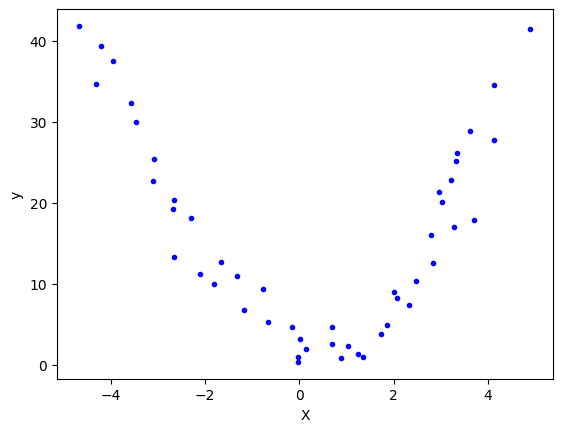

In [7]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [8]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
#print(X_train[0])
#print(X_train_trans[0])

In [11]:
# include_bias parameter

In [12]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test_trans)

In [14]:
r2_score(y_test,y_pred)

0.9194674262782349

In [15]:
print(lr.coef_)
print(lr.intercept_)

[ 0.         -0.96115771  1.86322401]
2.7362265943007245


In [16]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


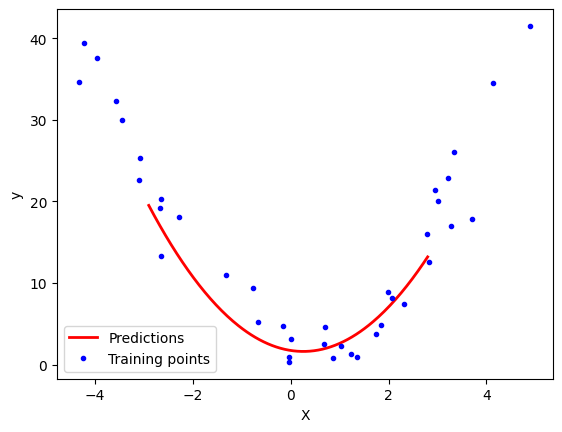

In [19]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
#plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()